<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Pandas (Good)</span></div>

## 1 Missing data

### 1.1 All missing data

In [8]:
df_class = pd.read_excel('dummy-class-1-of-2.xlsx', skiprows=1)

#------------------ Drop and reorganise columns  -----------------#
columns_to_keep = ['Student No', 'Name', 'Major', 'Gender',
                   'Test 1 (30%)', 'Test 2 (20%)']

df_class = df_class[columns_to_keep]

#------------------------- Rename columns ------------------------#
new_column_info = {'Student No': 'MATRIC_NO',
                   'Test 1 (30%)': 'Test 1',
                   'Test 2 (20%)': 'Test 2'}

df_class.rename(columns=new_column_info, inplace=True)

#--------------------- Set index to MATRIC_NO --------------------#
df_class.set_index('MATRIC_NO', drop=False, inplace=True)

#-------------------------- Rename stuff -------------------------#
replace_info = {
    'PHY': 'Physics',
    'CHM': 'Chemistry',
    'LS': 'Life Sciences',
    'CBIO': 'Comp. Biology',
    'F': 'Female',
    'M': 'Male',
    'NB': 'Non-binary'
}

df_class.replace(to_replace=replace_info, inplace=True)

#---------------- Remove the ' ' from column Test 2 --------------#


def clean(text):
    '''
    Function to remove ' ' from column 'Test 2'.
    To be applied using apply()
    '''
    try:
        return text.replace("'", "")
    except AttributeError:
        # This will handle the NaN of the missing data
        return text


df_class['Test 2'] = df_class['Test 2'].apply(clean)

#--------------- Convert column Test 2 to type float -------------#
new_type_info = {'Major': 'category',
                 'Gender': 'category',
                 'Test 2': 'float'}

df_class = df_class.astype(new_type_info)

#------------------------ Add a new column -----------------------#
df_class["Total"] = df_class["Test 1"] + df_class["Test 2"]

#------------------------- Export the file -----------------------#
df_class.to_excel('finalised_scores.xlsx', index=False)

df_class.head()

,MATRIC_NO,Name,Major,Gender,Test 1,Test 2,Total
MATRIC_NO,,,,,,,
A3028967J,A3028967J,Braiden Henson,Physics,Male,20.205,18.96,39.165
A1282849W,A1282849W,Gustavo Vang,Chemistry,Female,13.470,17.44,30.910
A5408925A,A5408925A,Ronin Christian,Physics,Male,18.366,15.56,33.926
A6973859L,A6973859L,Owen Anderson,Life Sciences,Female,18.366,16.36,34.726
A5410124H,A5410124H,Kyla Young,Physics,Male,15.306,NaN,NaN


In [9]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, A3028967J to A7667457P
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   MATRIC_NO  35 non-null     object  
 1   Name       35 non-null     object  
 2   Major      35 non-null     category
 3   Gender     35 non-null     category
 4   Test 1     33 non-null     float64 
 5   Test 2     32 non-null     float64 
 6   Total      31 non-null     float64 
dtypes: category(2), float64(3), object(2)
memory usage: 2.0+ KB


In [10]:
df_class.isna()

,MATRIC_NO,Name,Major,Gender,Test 1,Test 2,Total
MATRIC_NO,,,,,,,
A3028967J,False,False,False,False,False,False,False
A1282849W,False,False,False,False,False,False,False
A5408925A,False,False,False,False,False,False,False
A6973859L,False,False,False,False,False,False,False
A5410124H,False,False,False,False,False,True,True
A9568373Q,False,False,False,False,False,False,False
A6824244G,False,False,False,False,False,False,False
A9194090U,False,False,False,False,False,False,False
A4828364M,False,False,False,False,False,False,False


### 1.2 Columns and rows of the missing data

In [11]:

# Your code here
df_class.isna().any(axis=0)      # Are there any True in the columns?

MATRIC_NO    False
Name         False
Major        False
Gender       False
Test 1        True
Test 2        True
Total         True
dtype: bool

In [12]:
df_class.isna().any(axis=1)      # Are there any True in the rows?

MATRIC_NO
A3028967J    False
A1282849W    False
A5408925A    False
A6973859L    False
A5410124H     True
A9568373Q    False
A6824244G    False
A9194090U    False
A4828364M    False
A4607700C    False
A7067766E    False
A5569996J    False
A3202548I    False
A6131593U    False
A7653832E     True
A9462811I    False
A1218599T    False
A7210476B    False
A1512479K    False
A7986368Y    False
A2727061A     True
A2999472W    False
A7116486E    False
A6931452S    False
A9649096H    False
A1643380L    False
A6787293E    False
A5975988J    False
A3699958T     True
A1956366U    False
A1468689D    False
A3217320C    False
A6867791C    False
A4080490P    False
A7667457P    False
dtype: bool

### 1.3 More details of the missing numbers

In [18]:

# Your code here
mask_for_nan = df_class.isna().any(axis=1)
df_class[mask_for_nan]

,MATRIC_NO,Name,Major,Gender,Test 1,Test 2,Total
MATRIC_NO,,,,,,,
A5410124H,A5410124H,Kyla Young,Physics,Male,15.306,NaN,NaN
A7653832E,A7653832E,Quentin Kemp,Chemistry,Female,NaN,15.72,NaN
A2727061A,A2727061A,Malik Becker,Physics,Male,12.858,NaN,NaN
A3699958T,A3699958T,Norah Miles,Chemistry,Male,NaN,NaN,NaN


### 1.4 Dealing with missing numbers?

In [19]:

# Your code here
df_class.replace(np.nan, 99999, inplace=True)
df_class[mask_for_nan]

,MATRIC_NO,Name,Major,Gender,Test 1,Test 2,Total
MATRIC_NO,,,,,,,
A5410124H,A5410124H,Kyla Young,Physics,Male,15.306,99999.00,99999.0
A7653832E,A7653832E,Quentin Kemp,Chemistry,Female,99999.000,15.72,99999.0
A2727061A,A2727061A,Malik Becker,Physics,Male,12.858,99999.00,99999.0
A3699958T,A3699958T,Norah Miles,Chemistry,Male,99999.000,99999.00,99999.0


# Using fillna here threw out an error for me, the fix that worked is above

In [22]:
df_class.replace(99999, 0, inplace=True)
df_class[mask_for_nan]

,MATRIC_NO,Name,Major,Gender,Test 1,Test 2,Total
MATRIC_NO,,,,,,,
A5410124H,A5410124H,Kyla Young,Physics,Male,15.306,0.00,0.0
A7653832E,A7653832E,Quentin Kemp,Chemistry,Female,0.000,15.72,0.0
A2727061A,A2727061A,Malik Becker,Physics,Male,12.858,0.00,0.0
A3699958T,A3699958T,Norah Miles,Chemistry,Male,0.000,0.00,0.0


In [23]:
mask_for_nan_columns = df_class.isna().any(axis=0)
columns_to_keep = df_class.columns[~mask_for_nan_columns].values
df_class = df_class[columns_to_keep]

In [24]:
df_class.dropna(axis = 0, inplace=True)

In [27]:
df_class

,MATRIC_NO,Name,Major,Gender,Test 1,Test 2,Total
MATRIC_NO,,,,,,,
A3028967J,A3028967J,Braiden Henson,Physics,Male,20.205,18.960,39.165
A1282849W,A1282849W,Gustavo Vang,Chemistry,Female,13.470,17.440,30.910
A5408925A,A5408925A,Ronin Christian,Physics,Male,18.366,15.560,33.926
A6973859L,A6973859L,Owen Anderson,Life Sciences,Female,18.366,16.360,34.726
A5410124H,A5410124H,Kyla Young,Physics,Male,15.306,0.000,0.000
A9568373Q,A9568373Q,Wyatt Oliver,Physics,Male,12.246,14.088,26.334
A6824244G,A6824244G,Essence Bauer,Life Sciences,Male,16.530,16.720,33.250
A9194090U,A9194090U,Maryjane Sandoval,Life Sciences,Female,18.981,16.400,35.381
A4828364M,A4828364M,Carl Trujillo,Life Sciences,Non-binary,15.306,13.680,28.986


In [30]:
test_mean = df_class.loc['Test 1'].mean()
df.loc['Test 1'].fillna(test_mean)

KeyError: 'Test 1'

# Get the idea here but not why it is churning out an error as well

### 1.5 Itterating over a dataframe

In [32]:

# Your code here
for index, row in df_class.iterrows():
    name = row['Name']

    for column in ['Test 1', 'Test 2']:
        if np.isnan(row[column]):
            print(f'{index}: {name:<15}  missing data for {column}')
            df_class.loc[index, column] = 0

## 2 Combining dataframes

### 2.1 The complete recipe

In [33]:

# Your code here
df_class_2 = pd.read_excel('dummy-class-2-of-2.xlsx')

#------------------------- Rename columns ------------------------#
new_column_info = {'Student No': 'MATRIC_NO',
                   'Test 3 (50%)': 'Test 3'}

df_class_2.rename(columns=new_column_info, inplace=True)

#--------------------- Set index to MATRIC_NO --------------------#
df_class_2.set_index('MATRIC_NO', inplace=True)

df_class_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, A3028967J to A4080490P
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Test 3  31 non-null     float64
dtypes: float64(1)
memory usage: 496.0+ bytes


In [34]:
df_combined = pd.concat([df_class, df_class_2], axis=1)

## 3 Plotting directly from Pandas

### 3.1 Barcharts

In [35]:

# Your code here
from matplotlib import pyplot as plt
plt.style.use("seaborn-dark")

C:\Users\Chin Zhen Jie\AppData\Local\Temp\ipykernel_5632\1028850899.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-dark")


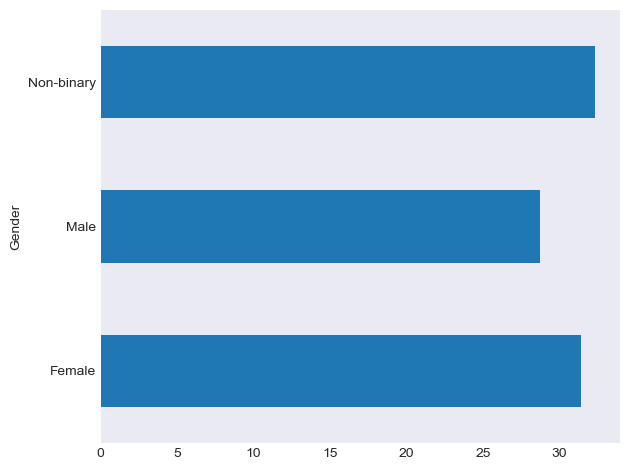

In [36]:
grp = df_combined.groupby(['Gender'])["Total"]
grp.mean().plot(kind='barh');
plt.tight_layout()
plt.show()

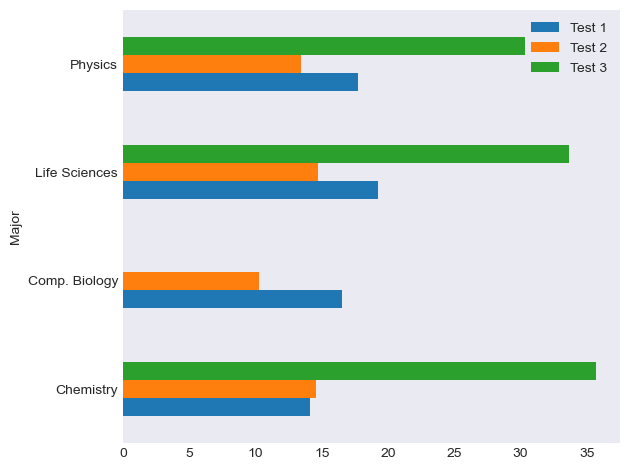

In [37]:
grp = df_combined.groupby(['Major'])[["Test 1", "Test 2", "Test 3"]]
grp.mean().plot(kind='barh')
plt.tight_layout()
plt.show()

### 3.2 Histograms

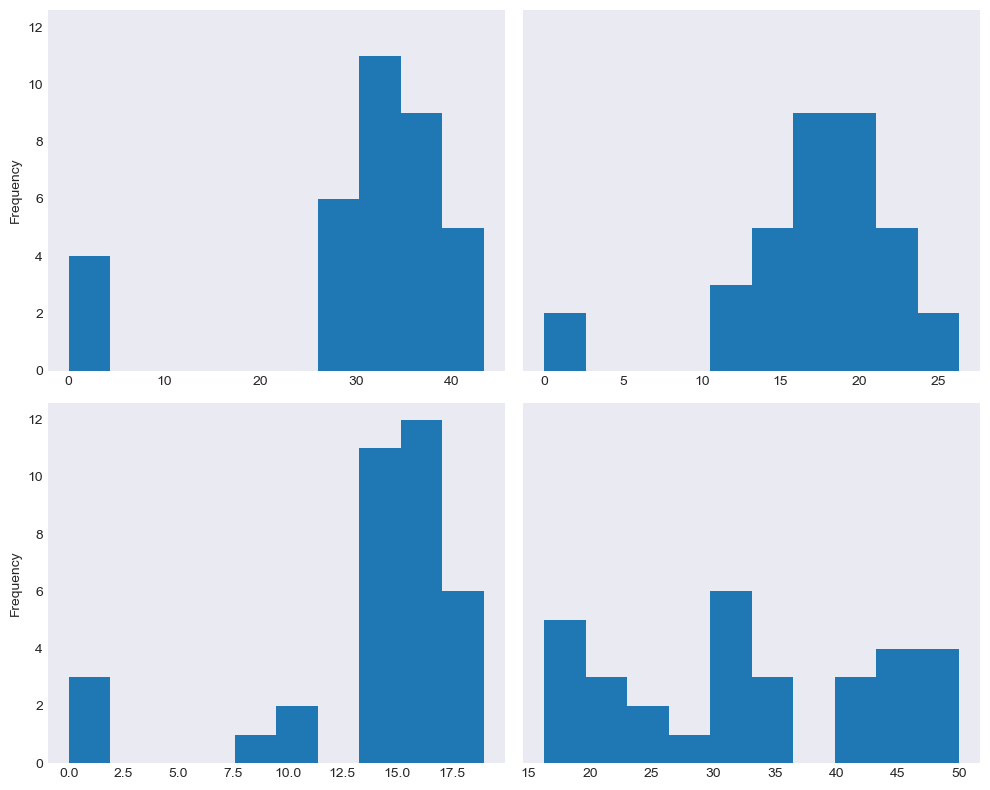

In [38]:

# Your code here
fix, ax = plt.subplots(nrows=2, ncols=2, sharey=True, figsize=(10,8))
df_combined['Total'].plot.hist(ax=ax[0, 0])
df_combined['Test 1'].plot.hist(ax=ax[0, 1])
df_combined['Test 2'].plot.hist(ax=ax[1, 0])
df_combined['Test 3'].plot.hist(ax=ax[1, 1])
plt.tight_layout()
plt.show()

### 3.3 Pie

<AxesSubplot: ylabel='None'>

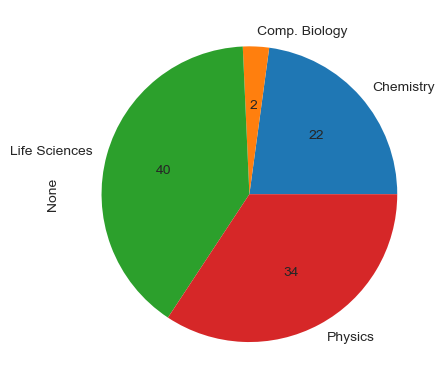

In [39]:

# Your code here
df_combined.groupby('Major').size().plot.pie(autopct="%d")

### 3.4 Boxplots

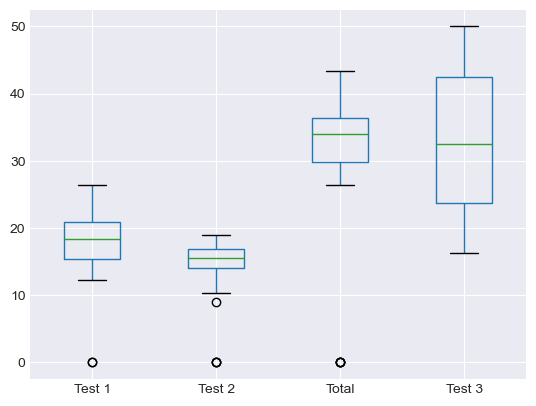

In [40]:

# Your code here
df_combined.boxplot()
plt.show()

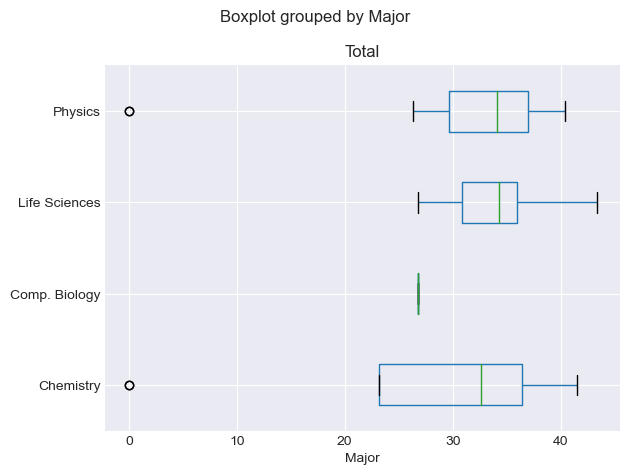

In [41]:
df_combined.boxplot(by='Major', column=['Total'], vert=False);
plt.tight_layout()
plt.show()

ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of ticklabels (4).

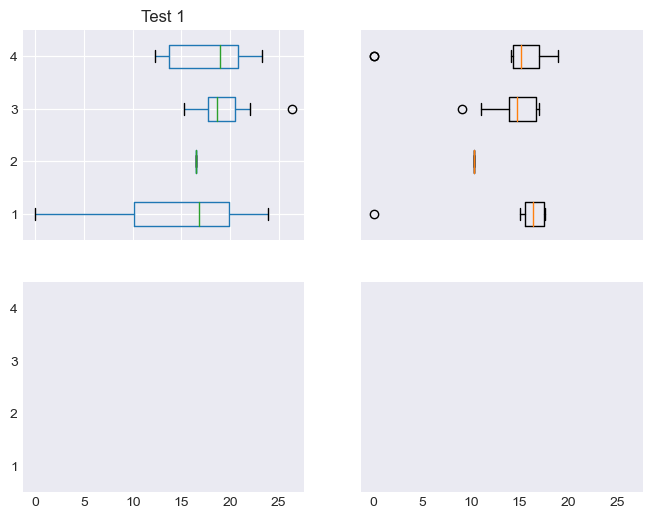

In [43]:
df_combined.boxplot(by='Major',
                    column=['Test 1', 'Test 2', 'Test 3', 'Total'],
                    vert=False, figsize=(8, 6));
plt.show()

# Cant troubleshoot here

## Exercise 1 :  Oh no! Yet another class!

In [45]:



# Your solution here
df_class = pd.read_excel("class_test-01.xlsx")
df_class_2 = pd.read_excel("class_test-02.xlsx")

In [55]:
new_column_info = {'Student No': 'S1',
                   'score': 'Test 1'}
df_class.rename(columns=new_column_info, inplace = True)

In [56]:
df_class

,S1,Test 1
0,A80082135P,16.98
1,A75939995U,15.92
2,A97067760C,15.16
3,A31152769E,17.22
4,A23853411O,17.73
5,A39424921D,16.46
6,A28951274W,15.75
7,A04222051I,15.37
8,A22419163B,14.49


In [58]:
new_column_info = {'Student No': 's2',
                   'Score': 'Test 2'}
df_class_2.rename(columns=new_column_info, inplace = True)

In [59]:
df_class_2

,s2,Test 2
0,A80082135P,19.83
1,A31152769E,15.72
2,A23853411O,19.37
3,A39424921D,21.96
4,A28951274W,19.20
5,A04222051I,19.23
6,A22419163B,19.11


In [69]:
df_combined = pd.concat([df_class, df_class_2], axis=1)
df_combined['Test 2'] = df_combined['Test 2'].fillna(0)
df_combined

,S1,Test 1,s2,Test 2
0,A80082135P,16.98,A80082135P,19.83
1,A75939995U,15.92,A31152769E,15.72
2,A97067760C,15.16,A23853411O,19.37
3,A31152769E,17.22,A39424921D,21.96
4,A23853411O,17.73,A28951274W,19.20
5,A39424921D,16.46,A04222051I,19.23
6,A28951274W,15.75,A22419163B,19.11
7,A04222051I,15.37,NaN,0.00
8,A22419163B,14.49,NaN,0.00


In [99]:
test_1 ={}
test_2 = {}
test_1 = df_combined.set_index('S1').to_dict()['Test 1']
test_2 = df_combined.set_index('s2').to_dict()['Test 2']

f_score = {}

def final_score(t1, t2):
    return ((t1*(35/25))+(t2*(65/35)))
           
for i in test_1.keys():
    for j in test_2.keys():
            if i == j:
                f_score[i] = final_score(test_1[i], test_2[j])
            elif i != j:
                f_score[i] = final_score(test_1[i], 0)
print(f_score)

{'A80082135P': 60.59914285714285, 'A31152769E': 53.302285714285716, 'A23853411O': 60.79485714285714, 'A39424921D': 63.82685714285715, 'A28951274W': 57.707142857142856, 'A04222051I': 57.23085714285715, 'A22419163B': 55.775999999999996}


In [112]:
test_1 ={}
test_2 = {}
test_1 = df_combined.set_index('S1').to_dict()['Test 1']
test_2 = df_combined.set_index('s2').to_dict()['Test 2']

f_score = {}

def final_score(t1, t2):
    return ((t1*(35/25))+(t2*(65/35)))
           
for i in test_1.keys():
    if test_2.get(i) != None:
        f_score[i] = final_score(test_1[i], test_2[i])
    else:
        f_score[i] = final_score(test_1[i], 0)
print(f_score)

{'A80082135P': 60.59914285714285, 'A75939995U': 22.288, 'A97067760C': 21.224, 'A31152769E': 53.302285714285716, 'A23853411O': 60.79485714285714, 'A39424921D': 63.82685714285715, 'A28951274W': 57.707142857142856, 'A04222051I': 57.23085714285715, 'A22419163B': 55.775999999999996}


# Dictionary with array